In [1]:
from nilearn.image import high_variance_confounds
from nilearn import image, plotting
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

/home/sshankar/env/fastsrm/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# Task of interest
task = 'raiders'

In [51]:
run = 11
filepattern = 'wrdc*run-' + str(run).zfill(2) + '*.nii.gz'

In [52]:
# Now create a list of movie session files 
movie_dir = os.path.join('..', task, 'derivatives/')
subs = sorted(glob.glob(movie_dir + 'sub*'))
confound_file = 'masked_imgs_confound_run' +  str(run).zfill(2) + '.npy'

# Calculate high variance confounds for the data files
for s, sub in enumerate(subs):
    if os.path.isdir(sub):
        sess = sorted(glob.glob(sub + '/ses*'))
        for si, ses in enumerate(sess):
            movie_imgs = sorted(glob.glob(ses + '/' + filepattern))
            for mi, movie_img in enumerate(movie_imgs):
                if os.path.isfile(movie_img) and not os.path.isfile(os.path.join(ses, confound_file)):
                    movie_imgs_confounds = high_variance_confounds(movie_img)
                    np.save(os.path.join(ses, confound_file), movie_imgs_confounds)

In [55]:
# Load the confound files
confounds = []
confound_pattern = '*_confound_*.npy'
for s, sub in enumerate(subs):
    sess = sorted(glob.glob(sub + '/ses*'))
    for i, ses in enumerate(sess):
        files = sorted(glob.glob(ses + '/' + confound_pattern))
        for fi, file in enumerate(files):
            confounds.append(np.load(file, allow_pickle=True))

In [56]:
len(confounds)

132

In [58]:
# The confound files for a particular session should
# all have the same length, irrespective of subject
# Create a list of confound array lengths
nsub = len(subs)
clen = np.zeros((nsub,12,5))
for si in range(nsub):
    for sesi in range(12):
        for c in range(5):
            clen[si,sesi,c] = len(confounds[si*12+sesi][:,c])

In [59]:
# Plot the lengths of the confound arrays
si = 0
for i in range(12):
    print(clen[9,i], '\t', clen[8,i], '\t', clen[2,i])

[374. 374. 374. 374. 374.] 	 [374. 374. 374. 374. 374.] 	 [374. 374. 374. 374. 374.]
[297. 297. 297. 297. 297.] 	 [297. 297. 297. 297. 297.] 	 [297. 297. 297. 297. 297.]
[314. 314. 314. 314. 314.] 	 [314. 314. 314. 314. 314.] 	 [314. 314. 314. 314. 314.]
[379. 379. 379. 379. 379.] 	 [379. 379. 379. 379. 379.] 	 [379. 379. 379. 379. 379.]
[347. 347. 347. 347. 347.] 	 [347. 347. 347. 347. 347.] 	 [347. 347. 347. 347. 347.]
[346. 346. 346. 346. 346.] 	 [346. 346. 346. 346. 346.] 	 [346. 346. 346. 346. 346.]
[350. 350. 350. 350. 350.] 	 [350. 350. 350. 350. 350.] 	 [350. 350. 350. 350. 350.]
[353. 353. 353. 353. 353.] 	 [353. 353. 353. 353. 353.] 	 [353. 353. 353. 353. 353.]
[281. 281. 281. 281. 281.] 	 [281. 281. 281. 281. 281.] 	 [281. 281. 281. 281. 281.]
[211. 211. 211. 211. 211.] 	 [211. 211. 211. 211. 211.] 	 [211. 211. 211. 211. 211.]
[375. 375. 375. 375. 375.] 	 [375. 375. 375. 375. 375.] 	 [375. 375. 375. 375. 375.]
[297. 297. 297. 297. 297.] 	 [297. 297. 297. 297. 297.] 	 [297. 2

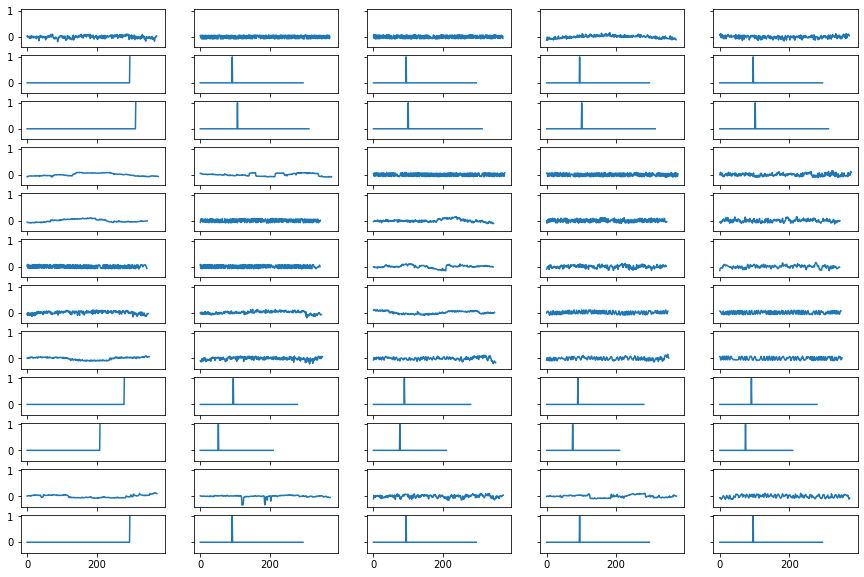

In [60]:
fig, axs = plt.subplots(12, 5, figsize=(15,10), sharex=True, sharey=True)
si = 0
for sesi in range(12):
    for c in range(5):
        axs[sesi,c].plot(confounds[si*12+sesi][:,c])